This notebook will create and save images by reading csv files

In [1]:
%matplotlib inline 
# If we don't do this then image will open as pop-up and not in notebook

In [79]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow

In [3]:
import wget
import time
import os
import copy

In [4]:
path = '/home/ubuntu/datasets/kannada-MNIST/'
os.chdir(path)

In [5]:
!ls -l --block=M $path

total 141M
-rw-r--r-- 1 ubuntu ubuntu  18M Sep 16 22:42 Dig-MNIST.csv
-rw-rw-r-- 1 ubuntu ubuntu  13M Jan 31 16:21 Kannada-MNIST.zip
drwxr-xr-x 2 ubuntu ubuntu   1M Jan 31 17:45 kannada_test_224by224
drwxr-xr-x 2 ubuntu ubuntu   2M Jan 31 17:41 kannada_train_224by224
-rw-r--r-- 1 ubuntu ubuntu   1M Sep 16 22:42 sample_submission.csv
-rw-r--r-- 1 ubuntu ubuntu   9M Sep 16 22:42 test.csv
-rw-r--r-- 1 ubuntu ubuntu 100M Sep 16 22:42 train.csv


### Generate Train Files

In [6]:
train = pd.read_csv('train.csv')

In [7]:
train.shape

(60000, 785)

In [8]:
train.iloc[:5,:5]

,label,pixel0,pixel1,pixel2,pixel3
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,0,0,0


In [9]:
train.iloc[6:15,:5]

,label,pixel0,pixel1,pixel2,pixel3
6,6,0,0,0,0
7,7,0,0,0,0
8,8,0,0,0,0
9,9,0,0,0,0
10,0,0,0,0,0
11,1,0,0,0,0
12,2,0,0,0,0
13,3,0,0,0,0
14,4,0,0,0,0


In [10]:
# Let's get the sd data and mean for all pixel values
train.stack().mean()

20.964062845010616

In [11]:
train.stack().std()

61.61477157586404

In [12]:
train.stack().max(), train.stack().min()

(255, 0)

__^ This looks as expected__

In [69]:
import cv2

In [70]:
dataframe = train
n = 65

In [71]:
img_label = dataframe.iloc[n, 0]
img_data = np.array(dataframe.iloc[n, 1:])
img_data = img_data.astype('float').reshape(28,28,1)

In [72]:
img_data.shape

(28, 28, 1)

In [74]:
img_data = cv2.resize(img_data, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

In [50]:
img_data.shape

(224, 224)

In [76]:
# normalizing the image
img_data = (img_data*(255.0/img_data.max())).astype(np.uint8)
img_data.shape

(224, 224)

In [35]:
os. getcwd()

'/home/ubuntu/datasets/kannada-MNIST'

In [53]:
type(img_data)

numpy.ndarray

In [66]:
img_data = np.array(img_data)

In [68]:
type(img_data)

numpy.ndarray

In [80]:
img = Image.fromarray(img_data)
img.save("file.png")

In [39]:
img= mpimg.imread('/home/ubuntu/datasets/kannada-MNIST/file.png')
img.shape

(224, 224)

In [28]:
def show_image_resized(dataframe, n):
    img_label = dataframe.iloc[n, 0]
    img_data = np.array(dataframe.iloc[n, 1:])
    img_data = img_data.astype('float').reshape(28,28)
    #img_data = im.resize img_data
    img_data = cv2.resize(img_data, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    # normalizing the image
    img_data = (img_data*(255.0/img_data.max())).astype(np.uint8)
    # show
    print(img_label)
    imshow(img_data, cmap='gray')

9


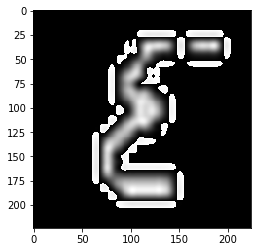

In [29]:
show_image_resized(train, 69)

### Converting training data

In [90]:
dataframe = train
len(dataframe)

60000

In [91]:
img_dim = 224

In [92]:
for row in range(len(dataframe)):
    img_id = row
    img_data = np.array(dataframe.iloc[row, 1:])
    img_data = img_data.astype('float').reshape(28,28)
    img_data = cv2.resize(img_data, dsize=(img_dim, img_dim), interpolation=cv2.INTER_CUBIC)
    # normalizing the image
    img_data = (img_data*(255.0/img_data.max())).astype(np.uint8)
    # bydefault the plt.image.imsave convert greyscale into RGB on the disk, so we use PIL
    img = Image.fromarray(img_data)
    img.save('/home/ubuntu/datasets/kannada-MNIST/kannada_train_224by224//'+str(img_id)+'.png')

In [37]:
del train

### Generate Test Files

In [28]:
test = pd.read_csv('test.csv')

In [39]:
test.shape

(5000, 785)

In [40]:
test.iloc[:10,:7]

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0
5,5,0,0,0,0,0,0
6,6,0,0,0,0,0,0
7,7,0,0,0,0,0,0
8,8,0,0,0,0,0,0
9,9,0,0,0,0,0,0


In [41]:
def show_image_resized(dataframe, n):
    img_id = dataframe.iloc[n, 0]
    img_data = np.array(dataframe.iloc[n, 1:])
    img_data = img_data.astype('float').reshape(28,28)
    #img_data = im.resize img_data
    img_data = cv2.resize(img_data, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    # normalizing the image
    img_data = (img_data*(255.0/img_data.max())).astype(np.uint8)
    # show
    print(img_id)
    imshow(img_data, cmap='gray')

169


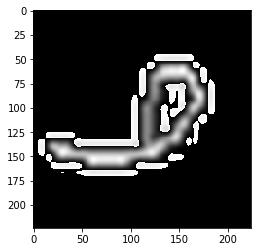

In [42]:
show_image_resized(test, 169)

In [93]:
dataframe = test
len(dataframe)

5000

In [94]:
for row in range(len(dataframe)):
    img_id = np.array(dataframe.iloc[row, 0])
    img_data = np.array(dataframe.iloc[row, 1:])
    img_data = img_data.astype('float').reshape(28,28)
    img_data = cv2.resize(img_data, dsize=(img_dim, img_dim), interpolation=cv2.INTER_CUBIC)
    # normalizing the image
    img_data = (img_data*(255.0/img_data.max())).astype(np.uint8)
    # bydefault the plt.image.imsave convert greyscale into RGB on the disk, so we use PIL
    img = Image.fromarray(img_data)
    img.save('/home/ubuntu/datasets/kannada-MNIST/kannada_test_224by224/'+str(img_id)+'.png')

In [45]:
del test, dataframe